In [1]:
import seaborn as sns
from matplotlib import style
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import warnings
import matplotlib.dates as mdates

In [2]:
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 1001)
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
start='1980-01-01'
end='2020-01-01'
spy=wb.DataReader('SPY',start=start,end=end,data_source='yahoo')

In [4]:
def create_df(df):
    newdf=df.copy()
    # stock return
    newdf['Return']=newdf['Adj Close'].pct_change()
    # stock return z-score
    newdf['Z(Return)']=(newdf['Return']-np.nanmean(newdf['Return'].values))/np.nanstd(newdf['Return'].values)
    # stock return positive or negative
    newdf['Sign']=np.sign(newdf['Return'])
    # stock return sign of 6 days return
    newdf['6Day-Sign']= newdf['Sign'].rolling(window=6).sum()
    # stock return 6 days return
    newdf['6Day-Return']= newdf['Return'].rolling(window=6).sum()
    return newdf
    

In [5]:
df=create_df(spy)

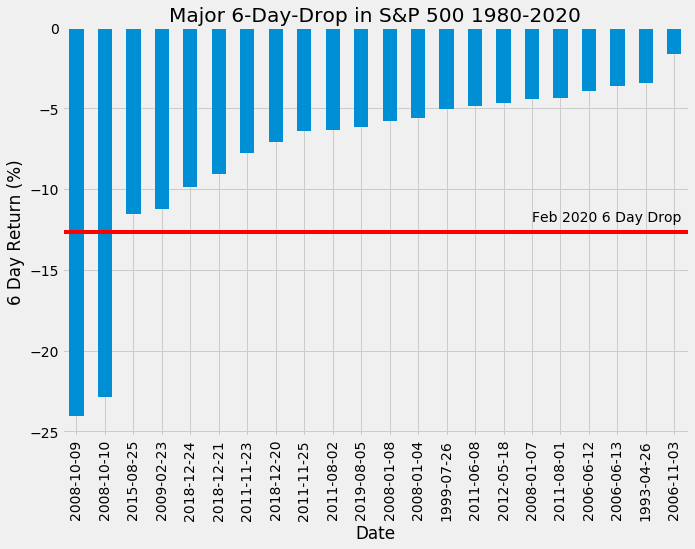

In [6]:
r=df[df['6Day-Sign']==-6]
r=r.reset_index()
r=r.sort_values(by='6Day-Return')
r['6Day-Return']=r['6Day-Return']*100
r['Date']=r['Date'].astype('str');
ax=r.plot(x='Date',y='6Day-Return',kind='bar');
ax.axhline(y=-12.65,color='red');
ax.annotate('Feb 2020 6 Day Drop', xy=(len(r)-1, -12.65), xytext=(len(r)-6, -12))
plt.ylabel('6 Day Return (%)');
plt.title('Major 6-Day-Drop in S&P 500 1980-2020');
plt.legend().remove();


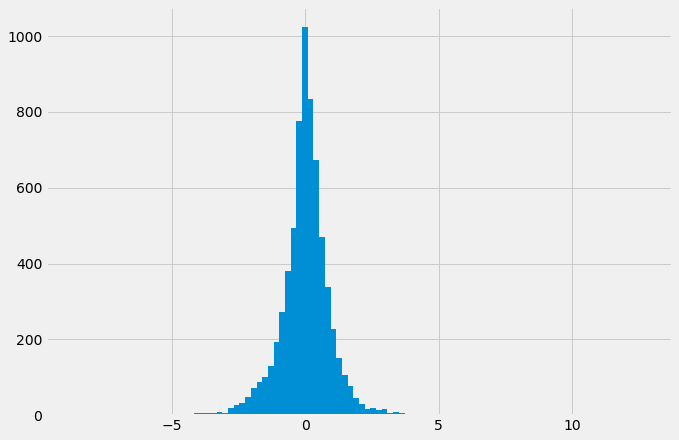

In [7]:
df['Z(Return)'].hist(bins=100);

In [8]:
r['Next 6 Day Return']=np.nan
for i in range(len(r)):
    dummydf=df.copy()
    dummydf=dummydf[dummydf.index>pd.to_datetime(r.loc[r.index[i],'Date'])]
    dummydf=dummydf[0:6]
    r['Next 6 Day Return'].iloc[i]=dummydf.Return.sum()*100

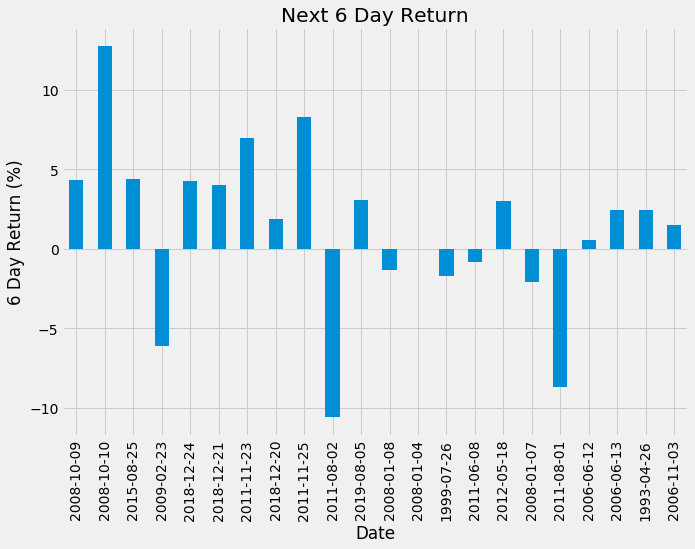

In [9]:
ax=r.plot(x='Date',y='Next 6 Day Return',kind='bar');
plt.ylabel('6 Day Return (%)');
plt.title('Next 6 Day Return');
plt.legend().remove();

